# Introduction
Machine learning can be of four types- Supervised, Unsupervised, Semi-supervised and Reinforcement learning. Unlike Supervised learning, Unsupervised learning has features measured for n observations but has no response, i.e., we have unlabeled training data. In this situation we cannot predict a response (as there is no response variable) and therefore we are left with the task of finding interesting patterns in the data. Some of the important unsupervised learning algorithms are - Clustering, Principal Component Analysis(PCA) and Association Rule learning. In this kernel we will explore Clustering and PCA. In case you are interested about Association Rule Learning, please check this [kernel](https://www.kaggle.com/bbhatt001/bakery-business-model-association-rules). 

## Clustering Algorithm
Clustering involves various techniques to find clusters or subgroups in the dataset. In this kernel we will discuss about **K-means clustering** and **hierarchical clustering**.
For the purpose of understanding of Clustering Algorithm we will be using Iris dataset .

Lets begin our study with the usual imports and read the data.

In [1]:
import numpy as np 
import pandas as pd 
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_rows', None, 'display.max_columns', None)

This dataset has 150 observations, 4 columns- sepal length, sepal width, petal length, petal width and 3 response - *Iris setosa*,  *Iris versicolor*, *Iris virginica*. Good thing- it has no missing data!

In [2]:
data=pd.read_csv('IRIS.csv')
data.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
sepal_length    150 non-null float64
sepal_width     150 non-null float64
petal_length    150 non-null float64
petal_width     150 non-null float64
species         150 non-null object
dtypes: float64(4), object(1)
memory usage: 5.9+ KB


In [4]:
data['species'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [5]:
data.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


To understand how clustering works we have to create a dataset that lacks the response. Hence, I have dropped the 'species' column from our features.

In [6]:
X=data.drop(['species'],axis=1)
X.shape

(150, 4)

## K-means clustering
K-means clustering is a simple approach where we partition our observations in a specified number of non-overlapping clusters. Here, we perform K-means clustering by first deciding the number of clusters='K'. Then we assign each observation to one of these K clusters. The cost function here is the sum of within cluster variation for all the K clusters and our aim is to minimize that. In brief the K-mean algorithm works by first randomly assigning the observations to any of the K-clusters. Then it iterates over the next 2 steps- i). it calculates the centroid for each cluster. A centroid is a vector of mean of p features for all the observations in that particular cluster. ii) then assigning/reassigning the observation to a cluster whose centroid is the nearest to this particular observation. This stops when the results don't change anymore. If we supply new samples, then KMeans remembers the centroids and assign the new samples to the cluster where the centroid is the closest.
K-means algorithm gets its name from the process of calculating the centroid from the means of the observations in a cluster.

Next, we play with KMeans which is implemented in scikit learn. We first import KMeans and instantiate a model with the number of clusters equal to 3. We then fit and predict the labels, similar to any other sklearn algorithm. Als, we scale our samples using `StandardScaler`

In [7]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X=scaler.fit_transform(X)
model=KMeans(n_clusters=3)
model.fit(X)
label=model.predict(X)
print(label)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 2 2 2 1 2 2 2 2 2 2 2 2 1 2 2 2 2 1 2 2 2
 2 1 1 1 2 2 2 2 2 2 2 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 1 2 1 1 1 1 2 1 1 1 1
 1 1 2 2 1 1 1 1 2 1 2 1 2 1 1 2 1 1 1 1 1 1 2 2 1 1 1 2 1 1 1 2 1 1 1 2 1
 1 2]


Next, I have plotted the Iris observations for Sepal length and petal width. Using KMeans the clusters have been obtained. 

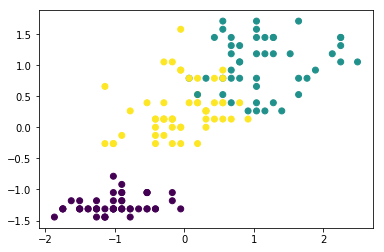

In [8]:
x=X[:,0]
y=X[:,3]
plt.scatter(x,y,c=label)

The question that comes up next is what about the accuracy of the Kmeans clusters. As in unsupervised learning the data is unlabeled, it is hard to answer this question. But, here for Iris we can use the function of crosstabulation to compare the number of species that are correctly labeled into different clusters. For this purpose first we create a dataframe that has a column label containing the labels obtained from Kmeans clusters and the second column that has the response column 'species' from the originial dataset. Then using pandas crosstab function with these columns we can obtain a table. According to this table we can see that the Kmeans clustering works well in detecting *Iris setosa* species but does not work that well for *Iris virginica* (for which it detected 36 in cluster 2 and 14 in cluster 1).

In [9]:
species=data['species']
species.head()

0    Iris-setosa
1    Iris-setosa
2    Iris-setosa
3    Iris-setosa
4    Iris-setosa
Name: species, dtype: object

In [10]:
df=pd.DataFrame({'label':label,'species':species})
ct= pd.crosstab(df['label'],df['species'])
print(ct)

species  Iris-setosa  Iris-versicolor  Iris-virginica
label                                                
0                 50                0               0
1                  0               11              36
2                  0               39              14


### Inertia
One of the ways to get an idea about the accuracy of the KMeans clustering is by inertia. Inertia is the measure of distance between each observation and its centroid. It determines how compact the cluster is. Lower the value of inertia better the cluster. The best number of clusters for KMeans clustering can be deduced from inertia. For better clustering we prefer lower inertia that means more number of clusters. Thus, we try to achieve a balance between low inertia and the number of clusters. We want inertia to be low enough but don't want the number of clusters to increase so much that we get individual observations as a cluster. Thus, in a plot of inertia vs number of clusters we pick the value for the number of clusters which decreases the inertia but doesn't lead to too many clusters. This is usually the elbow in the plot.  

In the example shown below we first made a list of inertia for corresponding number of clusters and then plotted the two. As observed from the plot, 3 is the right number of clusters for the given plot. 

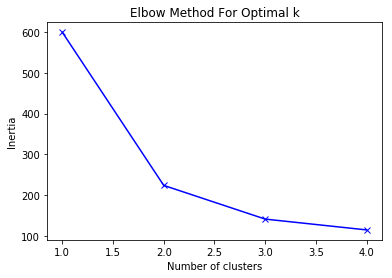

In [11]:
Inertia = []
K = range(1,5)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(X)
    Inertia.append(km.inertia_)

plt.plot(K, Inertia, 'bx-')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method For Optimal k')
plt.show()

## Hierarchical clustering 
Unlike KMeans which needs to be told about the number of clusters to make, hierarchical clustering doesn't need that. It produces a tree like representation of the data that informs the number of clusters and the observations falling in those clusters. This tree like structure is called a **dendrogram**. Here, we will discuss **agglomerative clustering** which is indicated by an upside down tree. As we move up this tree, leaves start to fuse/merge together into braches indicating that these are similar observations. As we move higher up, braches or banches and leaves start merging. The sooner these leaves/branches merge, more similar these observations are. Those observations that merge later, are quite different from each other. The height at which these observations merge indicate how different these observations are. When we are at the bottom of the upside down tree, it is easier to determine if 2 observations are similar enough to merge but as we climb up, we now have to merge clusters. So, how do we determine if the 2 clusters are similar or dissmilar? Here comes the concept of linkage. 
### Linkage
It defines dissmilarity between 2 clusters. Linkage can be of four types-
i) **Complete Linkage**- This defines maximal dissimilarity between the clusters.This computes pairwise dissmilarity between the 2 clusters and records the largest dissmilarity.
ii) **Single Linkage**- It is opposite of Complete Linkage. Unlike Complete linkage, it defines minimal dissimilarity between the linkage and keeps the smallest dissmilarity between the 2 clusters.
iii) **Average Linkage**- This defines mean intercluster dissimilarity. It keeps the average of all dissimilarities.
iv). **Centroid Linkage**- As the name indicates, it calculates dissimilarity between centroids of the 2 clusters
Average and Complete Linkage are the most commonly used Linkage types. But needless to say, that the choice of clustering depends upon the question in hand. 

Next, we will see Hierarchical clustering at work. We import dendrogram and linkage from scipy. We use Complete linkage here. Feel free to play with the different linkage methods and see how they affect the dendrograms.  I have labeled the leaves with the dataframe's index. You can also put a threshold line, if you want to separate the major clusters. Here, I have put a threshold line at height=5 to separate out the 3 major clusters.

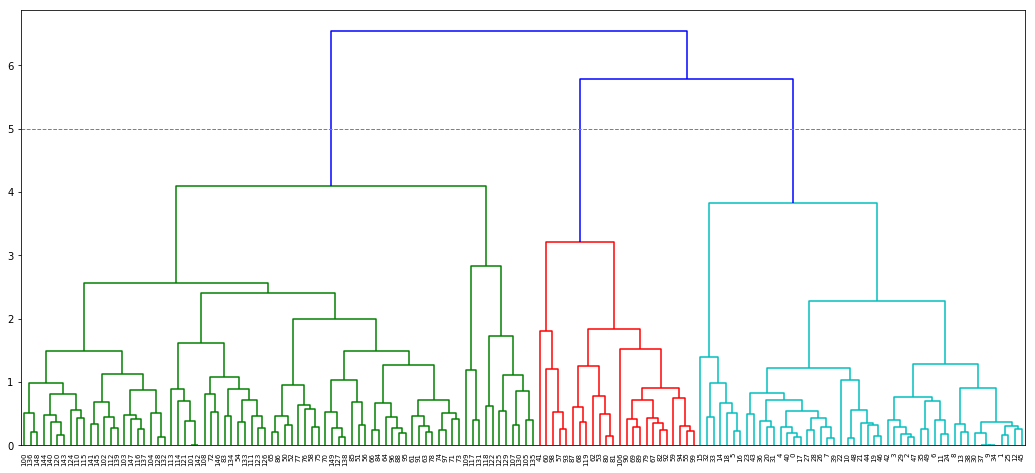

In [12]:
from scipy.cluster.hierarchy import linkage,dendrogram, fcluster
fig, ax= plt.subplots(figsize=(18,8))
mergings=linkage(X,method='complete')
dendrogram(mergings,  leaf_rotation=90,leaf_font_size=7)
plt.axhline(y=5, c='grey', lw=1, linestyle='dashed')
plt.show()

When there are many observations, the leaves become unreadable. In that case, we have to truncate the dendrogram to a readable size. We can decide the level in which case, no more than the decided 'p' level is displayed. A truncated part of the above dendrogram is shown here.

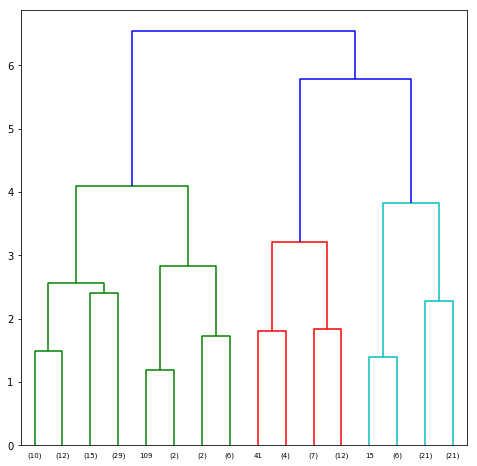

In [13]:
fig, ax= plt.subplots(figsize=(8,8))
dendrogram(mergings, truncate_mode = 'level', p=3,leaf_font_size=7)
plt.show()

In case, you are interested in how well hierarchical clustering has performed then for that I have labeled the leaved with the species name. As you can see that hierarchical clustering has worked well with *Iris setosa* but not for the other 2, as it mislabels/misclusters many *Iris versicolor *species as *Iris virginica*

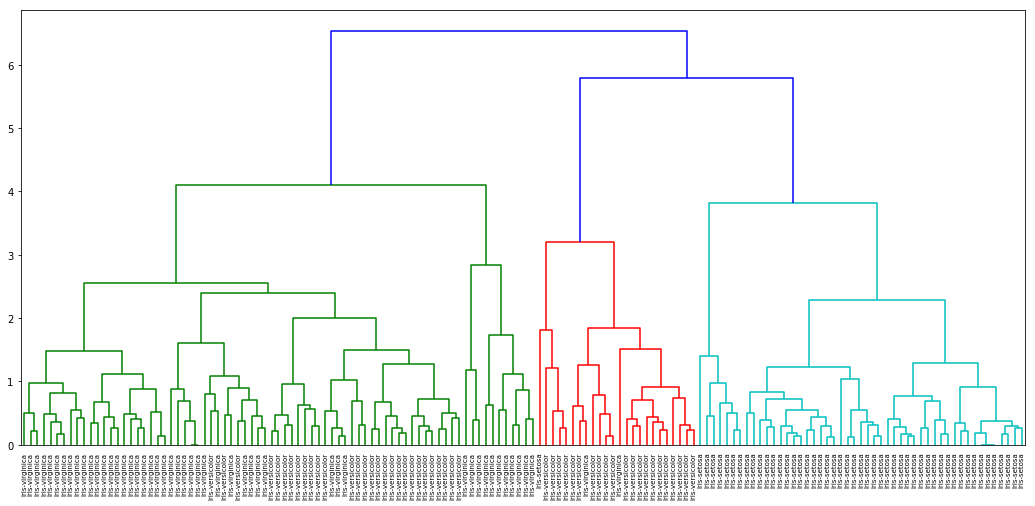

In [14]:
data=data.set_index('species')
fig, ax= plt.subplots(figsize=(18,8))
mergings=linkage(X,method='complete')
dendrogram(mergings, labels=data.index, leaf_rotation=90,leaf_font_size=7)
plt.show()

Another way, to analyse smaller clusters is by using `fcluster`, where we provide the height uptil which we want to see the observations and in which cluster they are falling. Then we create a dataframe with 2 columns - the labels (which is the numpy array of clusters obtained from fcluster operation) and the corresponding response/label in this case the 'species'. Here, I have played with height=3. Cluster 1 has both *Iris versicolor * and  *Iris virginica*. Cluster 5 and 6 have *Iris setosa*. These 2 clusters-5 and 6 will later merge at a height of 4 into a single cluster contain the pure sample of *Iris setosa*.

In [15]:
mergings=linkage(X,method='complete')
label_3 = fcluster(mergings, 3, criterion='distance')
pairs=pd.DataFrame({'labels':label_3, 'species':species})
pairs.sort_values('labels')

,labels,species
74,1,Iris-versicolor
104,1,Iris-virginica
103,1,Iris-virginica
102,1,Iris-virginica
101,1,Iris-virginica
100,1,Iris-virginica
97,1,Iris-versicolor
96,1,Iris-versicolor
95,1,Iris-versicolor
91,1,Iris-versicolor


## Principal Component Analysis
Principal Component Analysis (PCA) is a method of finding principal components in the data that define most of the variance associated with the original data and then using these components to find patterns in the data. It is an unsupervised learning approach as it doesn't employ usage of the response/labels. PCA is basically a dimension reductionality approach as it can shrink the number of variables to only a handful that defines the most variability in the data. It therefore, finds its use in supervised learning when the number of features is huge and not all of these features are interesting. Apart from deriving useful variables for supervised learning, PCA can be used for unsupervised data exploration.

Lets understand how PCA can be useful for unsupervised data exploration. Assume that we have n observations with p features. We can represent this data by a 2-D scatterplot. But if the number of p gets larger then we will need p(p-1)/2 scatterplots. In addition, most likely, each plot can give only a small fraction of the total information provided. Thus, to get a better representation we need to shrink the variable size to a low dimensions which can explain most of the variance and at the same time losing minimal information.

To explain PCA in a simple way lets assume that we have an p-dimensional dataset i.e., we have p number of features that describe all our observations. Now, imagine if we plot all these observations in this p-dimensional space, then the direction that spans most of the variation in our data gives us the Principal component 1 (PCA1). Then the second direction that spans second most variation in the data gives our Principal component 2 (PCA2) and so on. Thus, by doing this we can pick a few number of directions (that can explain most of the variation in our data) from N-number of dimenions thereby, reducing the dimensionality. This also aids in removing noise as we get rid of the features that do not explain much of variation. Also, I want to point out here that each principal component found is a linear combination of the features present in the original dataset.


To begin with how to perform PCA, we first need to import PCA . For PCA to work , we need all the variables in the same scale (if they are not originally). This can be done with `StandardScaler` (which we have been done above already). To obtain the best number of features that explain maximum variance we plot number of PCA vs variance explained. Such plot is called a Scree plot. As can be observed 2 PCA features explain most of the variation in this dataset.

(0, 5)

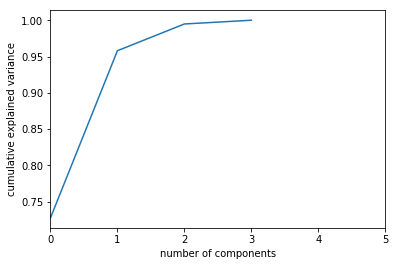

In [16]:
from sklearn.decomposition import PCA
pca=PCA().fit(X)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.xlim(0,5,1)

The variance explained by various PCA features can be shown in another way  (as shown below) using a barplot. It is also evident here that most of the variance is explained by the first 2 PCA features.

Text(0,0.5,'variance')

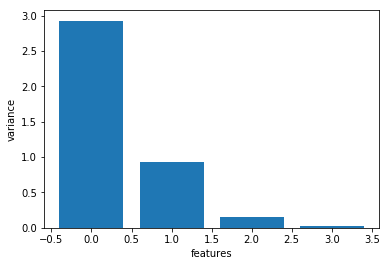

In [17]:
pca=PCA().fit(X)
features=range(pca.n_components_)
plt.bar(features, pca.explained_variance_)
plt.xlabel('features')
plt.ylabel('variance')

Next, we fit and transform our data.

In [18]:
pca=PCA(n_components=2)
X_pca=pca.fit_transform(X)
X_pca.shape

(150, 2)

Next using PCA transformed data we can plot a scatterplot. Here, it shows 3 distinct clusters using just 2 PCA features.

Text(0.5,1,'Iris species after PCA')

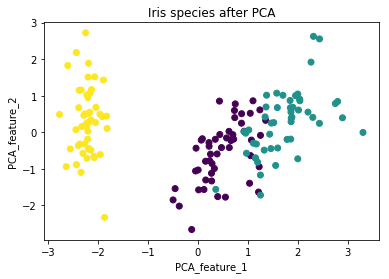

In [19]:
x_pca=X_pca[:,0]
y_pca=X_pca[:,1]
# to color code the clusters, I have number coded the species (this is the form accepted for color slection) 
d = {'Iris-versicolor':0, 'Iris-virginica':1, 'Iris-setosa':2}
labels = [d[spec] for spec in species]
plt.scatter(x_pca, y_pca, c=labels)
plt.xlabel('PCA_feature_1')
plt.ylabel('PCA_feature_2')
plt.title('Iris species after PCA' )


## Conclusion
 Unsupervised learning is a challenging but interesting part of machine learning which finds its application in various fields. For example a cancer researcher might be interested in clustering genes based on their expression in some cancer cell types for better understanding of the disease while a marketing person might be interested in finding subgroups of online shoppers based on their purchase history and subsequently targeting shoppers with the items their particular subgroups are interested in or purchased. In short, wherever you fall in the job spectrum, unsupervised learning most likely has something for everyone.
I hope you enjoyed and learned something new from this kernel. Thank you for reading!